# Logistic Regression Tutorial

## What is Logistic Regression?

Logistic regression is a statistical and machine learning technique used mainly for binary classification problems, though it can be extended to handle multi-class classification as well.

While the name contains `regression`, it is a classification algorithm used to predict the probability that a given input belongs to a particular class.



## Binary Classification Problem

Generate a dataset containing two classes and plot the dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

Text(0, 0.5, 'x_2')

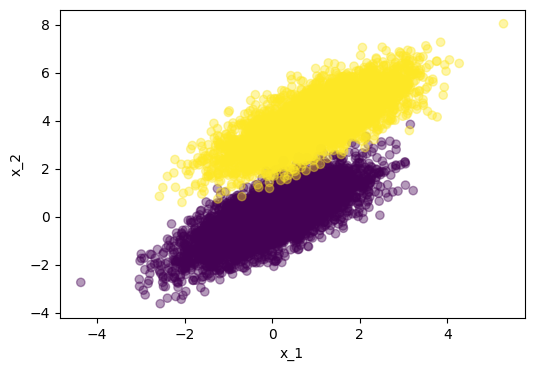

In [2]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1],
            c = Y, alpha = .4)
plt.xlabel('x_1')
plt.ylabel('x_2')

## Logistic Regression Model:

$$
P(y_i = 1 | x, \theta) = f(\theta_0 + \theta_1x_1+\theta_2x_2)
$$

Sigmoid function:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [6]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with log likelihood gradient
        output_error_signal = target - predictions

        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every so often
        if step == 0 or (step + 1) % 10000 == 0:
            print('[%d/%d] Log likelihood: %f' % (step + 1, num_steps, log_likelihood(features, target, weights)))

    return weights

Fit the logistic regression model using the generated data:

In [7]:
weights = logistic_regression(X, Y,
                     num_steps = 50000, learning_rate = 5e-5, add_intercept=True)

[1/50000] Log likelihood: -4359.555038
[10000/50000] Log likelihood: -135.219626
[20000/50000] Log likelihood: -129.129092
[30000/50000] Log likelihood: -127.533685
[40000/50000] Log likelihood: -126.955890
[50000/50000] Log likelihood: -126.715388


Compare the weights given by the LogisticRegression function provided by `sklearn` library:

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X, Y)

print(clf.intercept_, clf.coef_)
print('Weights: ', weights)

[-14.28665397] [[-5.39991191  8.46691245]]
Weights:  [-13.66077427  -5.15273636   8.09896664]


Evaluate the performance of the logistic regression model.

In [9]:
final_scores = np.dot(np.hstack((np.ones((X.shape[0], 1)),
                                 X)), weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == Y).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(X, Y)))

Accuracy from scratch: 0.9952
Accuracy from sk-learn: 0.9952


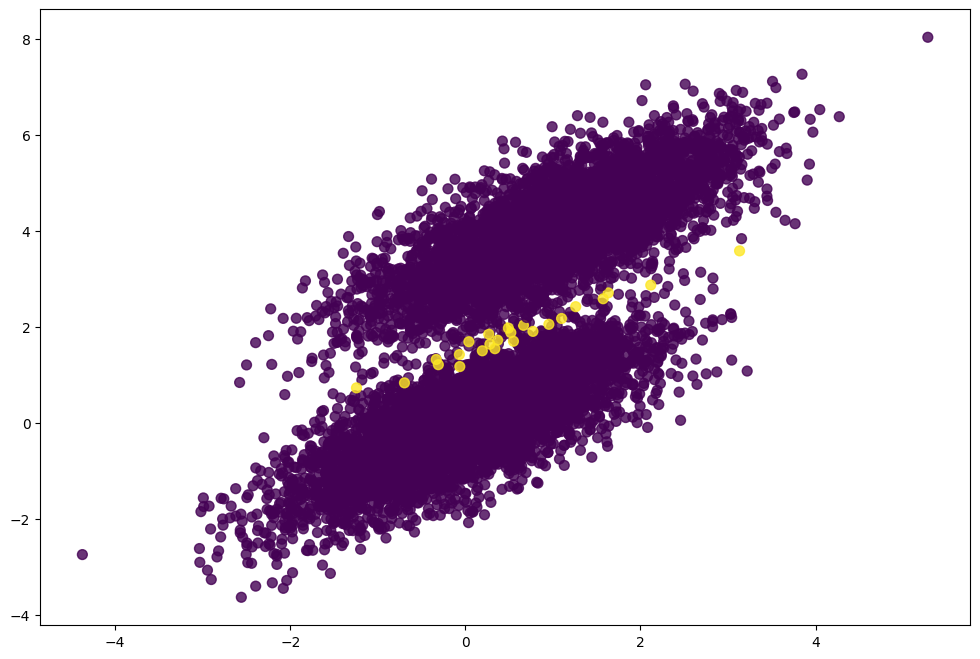

In [10]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1],
            c = preds == Y - 1, alpha = .8, s = 50)